### **Universidad Central de Venezuela**
### **Facultad de Ingeniería**
### **Escuela de Ingeniería Eléctrica**
## <center>**Proyecto N°1**<center>

<div style='text-align: right;'>
    <h4>Periodo 2023-3</h4>
    <i>02/2023<br>CI 29571461 Ricardo Santana</i>
</div>

### **1. Introducción**

En el proyecto a presentar se desarrollan ejercicios prácticos que permiten aplicar diversos métodos numericos que facilitan los cálculos y permiten obtener una aproximación muy precisa o razonable, para modelar un sistema. Entre los diversos métodos numericos que exiten, cabe señalar los directos e iterativos para resolver ecuaciones lineales, las diversas maneras de representar un fenomeno a través de interpolación y la implementación del método de Newton para resolver sistemas no lineales; que serán utilizados para resolver los problemas a continuación.

### **2. Programas a utilizar**

In [1]:
#librerias necesarias
import math as mt
import random as rd
import sympy as sp
from sympy.abc import x,y,z,alpha,psi,theta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

#programas diseñados y documentados; con respectiva ruta
ruta = 'C:\\Users\\Brayan Acosta\\Documents\\Semestre 2023-3\\Calculo Numerico\\Drive-Ric\\proyecto1'
ruta_lab1 = 'C:\\Users\\Brayan Acosta\\Documents\\Semestre 2023-3\\Calculo Numerico\\Drive-Ric\\LAB-01'
ruta_lab2 = 'C:\\Users\\Brayan Acosta\\Documents\\Semestre 2023-3\\Calculo Numerico\\Drive-Ric\\LAB-02'
ruta_lab3 = 'C:\\Users\\Brayan Acosta\\Documents\\Semestre 2023-3\\Calculo Numerico\\Drive-Ric\\LAB-03'

for i in (ruta,ruta_lab1,ruta_lab2,ruta_lab3):
    sys.path.append(i) 
from resolver_SEL import *
from interpolante import *
from cerosDeFunciones import *
from sisEcuNoLin import *
from herramientas import *

### **3. Problema N°1**

La imagen muestra un sistema Masa-Resorte ideal. Se debe escribir el sistema de ecuaciones que
modelan el sistema, para luego resolver por todos los métodos estudiados, directos e iterativos, el
sistema de ecuaciones lineales. Para los métodos iterativos se fija una tolerancia de $Tol = 10^{−6}$,
dejando el iterado inicial $x_0$ y el parámetro de relajación para el método ${\bf SOR}$, $\omega$, por cuenta del participante.

<center>
    <img src="./figura1.jpg" alt="figura 1" style="width: 15cm;"/>
</center>

<center>Figure 1.1. Sistema Masa-Resorte</center>

<!-- ![Figura 2](figura2.jpg) -->

Simplificando el sistema a través del equivalente de resortes en paralelo, hasta obtener la Figura 1.1

Para los resorte entre $m_1$ y $m_2$

$$\begin{split}
    k_2 = & K_2||{K_3 \over 4}||{K_3 \over 4} = K_2 + {K_3 \over 4} + {K_3 \over 4} \\
    k_2 = & K_2 + {K_3 \over 2}
\end{split}$$

Así mismo, Para los resorte entre $m_2$ y $m_3$

$$\begin{split}
    k_4 = & K_4||{K_3 \over 4}||{K_3 \over 4} = K_4 + {K_3 \over 4} + {K_3 \over 4} \\
    k_4 = & K_4 + {K_3 \over 2}
\end{split}$$

<center>
    <img src="./ejercicio1.jpg" alt="ejercicio 1" style="height: 15cm;"/>
</center>

<center>Figure 1.1. Sistema Masa-Resorte Simplificado y Diagrama de cuerpo libre de cada masa</center>

Por la segunda ley de Newton se sabe que

$$ \sum F = m a \; \; \; (1.1)$$

A partir de la ecuación (1.1) surge el sistema de ecuaciones relacionado al sistema Masa-Resorte, aplicado el digrama de cuerpo libre de cada masa por separado, con los x positivos hacia abajo.

$$\left\{ \begin{array}{rclr}
    k_2(x_2-x_1) - K_1x_1 + m_1g - F_1 & = & m_1a_1 & (ecu. m_1) \\
    k_4(x_3-x_2) - k_2(x_2-x_1) + m_2g - F_2 & = & m_2a_2 & (ecu. m_2) \\
    - K_5x_3 - k_4(x_3-x_2) - F_3 + m_3g & = & m_3a_3 & (ecu. m_3)
\end{array} \right.$$

Organizando

$$\left\{ \begin{array}{rcl}
    -(K_1+k_2)x_1 + k_2x_2 - m_1a_1 & = & F_1 - m_1g \\
    k_2x_1 - (k_2+k_4)x_2 + k_4x_3 - m_2a_2 & = & F_2 - m_2g \\
    k_4x_2 - (k_4+K_5)x_3 - m_3a_3 & = & F_3 - m_3g
\end{array} \right.$$

Sabiendo que

$$a = {dv \over dt} = {d \over dt}({dx \over dt}) = {d^2x \over dt^2}$$

utilizando la notación ${dx \over dt} = \dot{x}$

$$a_i = \ddot{x}_i$$

quedando el sistema (3.4)

$$(3.4) \left\{ \begin{array}{rcl}
    -(K_1+k_2)x_1 + k_2x_2 - m_1\ddot{x}_1 & = & F_1 - m_1g \\
    k_2x_1 - (k_2+k_4)x_2 + k_4x_3 - m_2\ddot{x}_2 & = & F_2 - m_2g \\
    k_4x_2 - (k_4+K_5)x_3 - m_3\ddot{x}_3 & = & F_3 - m_3g
\end{array} \right.$$

Analizando la figura 1.1 en su estado de equilibrio, donde $F_i$ actúa permanentemente, se busca los valores de $x_i$ inicialmente antes de que se comience a oscilar el sistema. Por tal motivo se busca una respuesta partícula de la ecuación diferencial, entonces asumimos que

$$x_{pi} = c_i$$

donde $c_i \in \mathbb{R}$ es constante y una condición inicial para su etapa de oscilación.

Entonces, derivando dos veces

$$\ddot{x}_{pi} = 0$$

Quedando el sistema (3.4) como

$$\left\{ \begin{array}{rcl}
    -(K_1+k_2)c_1 + k_2c_2 & = & F_1 - m_1g \\
    k_2c_1 - (k_2+k_4)c_2 + k_4c_3 & = & F_2 - m_2g \\
    k_4c_2 - (k_4+K_5)c_3 & = & F_3 - m_3g
\end{array} \right.$$


In [2]:
#definiendo datos
df1 = pd.read_csv('data1.csv')
datos1 =df1.loc[0,:].to_numpy().astype(float)
resp1 = ['c1','c2','c3']
resp2 = ['A1','A2','A3']
K1, K2, K3, K4, K5, m1, m2, m3, F1, F2, F3 = datos1
df1

,K1,K2,K3,K4,K5,m1,m2,m3,F1,F2,F3
0,840,600,1200,690,450,5,10,15,40,30,50
1,[N/m],[N/m],[N/m],[N/m],[N/m],[Kg],[Kg],[Kg],[N],[N],[N]


In [3]:
#definiendo equivalentes e resorte
k2 = K2 + K3/4
k4 = K4 + K3/4
#gravedad
g = 9.8

In [4]:
#definiendo matriz coeficientes según las ecuaciones planteadas
A = [[-(K1+k2), k2, 0],[k2, -(k2+k4), k4],[0, k4, -(k4+K5)]]

#definiendo matriz de termino independiente
b = [F1-m1*g, F2-m2*g, F3-m3*g]

#definiendo parametros para métodos iterativos
itera, tol, omg = 100, 1e-6, 1.4

In [5]:
sist1 = SEL(A, b)

'métodos directos'
d1 = sist1.metodo_directo('gauss')
dfd1, dferrd1 = a_df(d1, sist1, 'gauss', resp1)
d2 = sist1.metodo_directo('palu')
dfd2, dferrd2 = a_df(d2, sist1, 'palu', resp1)
d3 = sist1.metodo_directo('cholesky')
dfd3, dferrd3 = a_df(d3, sist1, 'cholesky', resp1)

'métodos iterativos'
d4 = sist1.metodo_iterativo('jacobi', itera, tol, omg)
dfd4, dferrd4 = a_df(d4[0], sist1, 'jacobi', resp1)
d5 = sist1.metodo_iterativo('seidel', itera, tol, omg)
dfd5, dferrd5 = a_df(d5[0], sist1, 'seidel', resp1)
d6 = sist1.metodo_iterativo('sor', itera, tol, omg)
dfd6, dferrd6 = a_df(d6[0], sist1, 'sor', resp1)

#guardando en archivos csv
dfsist1 = pd.concat([dfd1,dfd2,dfd3,dfd4,dfd5,dfd6], axis=1)
dferrsist1 = pd.concat([dferrd1,dferrd2,dferrd3,dferrd4,dferrd5,dferrd6], axis=1)
dfsist1.to_csv(f'{ruta}/respuesta_equilibrio.csv')
dferrsist1.to_csv(f'{ruta}/error_respuesta_equilibrio.csv')

La matriz A no es definida positiva


In [6]:
print('tabla de resultados sistema 1')
dfsist1

tabla de resultados sistema 1


,gauss,palu,cholesky,jacobi,seidel,sor
c1,0.102064,0.102064,NaN,0.102064,0.102064,0.102064
c2,0.187324,0.187324,NaN,0.187324,0.187324,0.187324
c3,0.196147,0.196147,NaN,0.196147,0.196147,0.196147


In [7]:
print('tabla de errores de resultados sistema 1')
dferrsist1

tabla de errores de resultados sistema 1


,gauss,palu,cholesky,jacobi,seidel,sor
1,0.000000,0.000000,NaN,-2.662605e-08,-5.679708e-07,4.087176e-07
2,0.000004,0.000006,NaN,-9.350357e-07,-4.295279e-07,2.179827e-06
3,0.000005,0.000004,NaN,-2.928863e-08,0.000000e+00,-2.179827e-06


Respuesta del sistema en condiciones de equilibrio:

$$\begin{split}
    x_{p1} & =	0.102064 [m] = 10.21 [cm]\\
    x_{p2} & =	0.187324 [m] = 18.73 [cm]\\
    x_{p3} & =	0.196147 [m] = 19.61 [cm]
\end{split}$$

Analizando la figura 1.1. en su estado de oscilación, por lo cual todas las $F_i$ dejan de aplicarse, el sistema sale de su estado de equilibrio y comienza a oscilar. Entonces el sistema se transforma (3.4) a:

$$\left\{ \begin{array}{rcl}
    -(K_1+k_2)x_1 + k_2x_2 - m_1\ddot{x}_1 & = & 0 \\
    k_2x_1 - (k_2+k_4)x_2 + k_4x_3 - m_2\ddot{x}_2 & = & 0 \\
    k_4x_2 - (k_4+K_5)x_3 - m_3\ddot{x}_3 & = & 0
\end{array} \right.$$

Es decir, se desea hallar la respuesta homogénea a las ecuaciones diferenciales, por tanto se asume una posible respuesta homogénea:

$$\begin{split}
    x_{hi} & = A_icos(\omega t) \\
    \dot{x}_{hi} & = -\omega A_isen(\omega t) \\
    \ddot{x}_{hi} & = -\omega^2 A_icos(\omega t)
\end{split}$$

donde:

$A_i$ : máximo desplazamiento hacia arriba o abajo de la $m_i$, partiendo de su posición de equilibrio en metros [m]

$\omega$ : frecuencia de cada ciclo en radianes por segundo [rad/seg]

$t$ : tiempo transcurrido desde la ausencia de fuerza $F_i$

Sustituyendo en el sistema,

$$\left\{ \begin{array}{rcl}
    -(K_1+k_2)A_1cos(\omega t) + k_2A_2cos(\omega t) - m_1(-\omega^2 A_1cos(\omega t)) & = & 0 \\
    k_2A_1cos(\omega t) - (k_2+k_4)A_2cos(\omega t) + k_4A_3cos(\omega t) - m_2(-\omega^2 A_2cos(\omega t)) & = & 0 \\
    k_4A_2cos(\omega t) - (k_4+K_5)A_3cos(\omega t) - m_3(-\omega^2 A_3cos(\omega t)) & = & 0
\end{array} \right.$$

entonces,

$$\left\{ \begin{array}{rcl}
    -(K_1+k_2)A_1 + k_2A_2 + m_1\omega^2 A_1 & = & 0 \\
    k_2A_1 - (k_2+k_4)A_2 + k_4A_3 + m_2\omega^2 A_2 & = & 0 \\
    k_4A_2 - (k_4+K_5)A_3 + m_3\omega^2 A_3 & = & 0
\end{array} \right.$$

Organizando factores

$$\left\{ \begin{array}{rcl}
    [m_1\omega^2-(K_1+k_2)]A_1 + k_2A_2 & = & 0 \\
    k_2A_1 + [m_2\omega^2 - (k_2+k_4)]A_2 + k_4A_3 & = & 0 \\
    k_4A_2 + [m_3\omega^2 - (k_4+K_5)]A_3 & = & 0
\end{array} \right.$$

In [8]:
#definiendo la frecuencia angular
w = 1

#redefiniendo matriz coeficientes según las ecuaciones planteadas
A = [[m1*w**2-(K1+k2), k2, 0],[k2, m2*w**2-(k2+k4), k4],[0, k4, m3*w**2-(k4+K5)]]

#redefiniendo matriz de termino independiente
b = [0,0,0]

#parametros para métodos iterativos
itera, tol, omg = 100, 1e-6, 1.4

In [9]:
sist2 = SEL(A, b)

'métodos directos'
d1 = sist2.metodo_directo('gauss')
dfd1, dferrd1 = a_df(d1, sist2, 'gauss', resp2)
d2 = sist2.metodo_directo('palu')
dfd2, dferrd2 = a_df(d2, sist2, 'palu', resp2)
d3 = sist2.metodo_directo('cholesky')
dfd3, dferrd3 = a_df(d3, sist2, 'cholesky', resp2)

'métodos iterativos'
d4 = sist2.metodo_iterativo('jacobi', itera, tol, omg)
dfd4, dferrd4 = a_df(d4[0], sist2, 'jacobi', resp2)
d5 = sist2.metodo_iterativo('seidel', itera, tol, omg)
dfd5, dferrd5 = a_df(d5[0], sist2, 'seidel', resp2)
d6 = sist2.metodo_iterativo('sor', itera, tol, omg)
dfd6, dferrd6 = a_df(d6[0], sist2, 'sor', resp2)

#guardando en archivos csv
dfsist2 = pd.concat([dfd1,dfd2,dfd3,dfd4,dfd5,dfd6], axis=1)
dferrsist2 = pd.concat([dferrd1,dferrd2,dferrd3,dferrd4,dferrd5,dferrd6], axis=1)
dfsist2.to_csv(f'{ruta}/respuesta_oscilación.csv')
dferrsist2.to_csv(f'{ruta}/error_respuesta_oscilación.csv')

La matriz A no es definida positiva


In [10]:
print('tabla de resultados sistema 2')
dfsist2

tabla de resultados sistema 2


,gauss,palu,cholesky,jacobi,seidel,sor
A1,-0.0,-0.0,NaN,1.573348e-10,7.009844e-10,-1.287832e-10
A2,-0.0,-0.0,NaN,0.000000e+00,8.299601e-10,-3.085841e-12
A3,-0.0,-0.0,NaN,2.107182e-10,5.766039e-10,-3.759316e-11


In [11]:
print('tabla de errores de resultados sistema 2')
dferrsist2

tabla de errores de resultados sistema 2


,gauss,palu,cholesky,jacobi,seidel,sor
1,0.0,0.0,NaN,-2.729758e-07,-4.692439e-07,2.206616e-07
2,0.0,0.0,NaN,3.502123e-07,-3.586012e-07,-1.473207e-07
3,0.0,0.0,NaN,-3.002734e-07,1.058791e-22,5.051527e-08


Quedando así una respuesta en el orden de los nanómetros debido al alto coeficiente de compresión de los resortes, quedando la respuesta

$$x_i(t) = x_hi(t) + x_pi(t)$$
$$x_i(t) = A_i cos(\omega t) + c_i$$

pudiendo despreciarse $A_i$ según los últimos resultado quedando

$$x_i = c_i \; \forall \; i = 1, 2, 3$$

### **4. Problema N°2**

La Figura 2, representa un sistema de varillas acopladas por cuatro articulaciones.

<center>
    <img src="./figura2.jpg" alt="figura 2" style="width: 15cm;"/>
</center>

<center>Figure 2.1. Sistema de varillas</center>

<!-- ![Figura 2](figura2.jpg) -->

La siguiente data corresponde a los datos experimentales para $\alpha$ y $\phi$ con instrumento de medición
cuya apreciación es de $0.01$.

In [12]:
df2 = pd.read_csv('data2.csv')
alp0 = df2.iloc[:,0].to_numpy() #lista de ángulos alpha
psi0 = df2.iloc[:,1].to_numpy() #lista de ángulos psi
incert = df2.iloc[:,2].to_numpy() #lista de incertidumbres
df2

,alpha [grados],phi [grados],apreciacion [grados]
0,0,0.00,0.01
1,10,8.07,0.01
2,20,16.11,0.01
3,30,24.11,0.01
4,40,32.02,0.01
5,50,39.81,0.01
6,60,47.45,0.01
7,70,54.89,0.01
8,80,62.06,0.01
9,90,68.89,0.01


**(Ra)** Hallando el polinomio $\phi = P_n(\alpha)$ que interpola la data.

Debido al bajo error del método de newton para ajustar el polinomio interpolante, el cual es de orden $10^{-24}$, se utilizará este método para hallar $P_n(\alpha)$

In [13]:
dat = data(alp0,psi0)
difdiv, pol = dat.polinomio_newton()
pol = pol.subs(x, alpha)


$P_n(\alpha) =$

In [14]:
pol

alpha*(-2.97374081474942e-32*alpha**17 + 4.82911361021325e-29*alpha**16 - 3.61864425053381e-26*alpha**15 + 1.65974490906295e-23*alpha**14 - 5.21166806866469e-21*alpha**13 + 1.1871228342854e-18*alpha**12 - 2.02770673051479e-16*alpha**11 + 2.64772849542172e-14*alpha**10 - 2.66991357260454e-12*alpha**9 + 2.08573062161817e-10*alpha**8 - 1.25861445510492e-8*alpha**7 + 5.81362764162481e-7*alpha**6 - 2.02215348303026e-5*alpha**5 + 0.000516007275220025*alpha**4 - 0.00927188042522191*alpha**3 + 0.1096706345776*alpha**2 - 0.754341440344195*alpha + 3.04337775802592)

**(Rb)** Interpolando la data con un polinomio trigonométrico.

Para una mayor precisión el grado debe maximizarse el grado del polinomio trigonometrico, sin obviar que se cumpla que:

$$2M < N$$

donde,

$M$ : grado del polinomio trigonometrico

$N$ : cantidad de puntos ($x_i,y_i$) menos 1

In [15]:
N = len(dat.x)
M = N//2 - 1
print('Grado del polinomio trigonometrico interpolante: ')
M

Grado del polinomio trigonometrico interpolante: 


8

$P_{tr}(\alpha) =$

In [16]:
trig = dat.polinomio_trigonometrico(M)
trig = trig.subs(x, alpha)
trig

-33.5170332089168*sin(pi*alpha/90) - 13.7665480634969*sin(pi*alpha/45) - 8.28978761511437*sin(pi*alpha/30) - 5.62331073344934*sin(2*pi*alpha/45) - 3.93662443276451*sin(pi*alpha/18) - 2.70103700935877*sin(pi*alpha/15) - 1.70042880854162*sin(7*pi*alpha/90) - 0.823012350467296*sin(4*pi*alpha/45) - 5.80800603085304*cos(pi*alpha/90) + 1.07484584683006*cos(pi*alpha/45) + 2.94166666666665*cos(pi*alpha/30) + 3.62732845100319*cos(2*pi*alpha/45) + 3.93701615909159*cos(pi*alpha/18) + 4.09388888888885*cos(pi*alpha/15) + 4.17765653842809*cos(7*pi*alpha/90) + 4.2211590355001*cos(4*pi*alpha/45) + 63.2377777777778

**(Rc)** En una sola gráfica representar; los puntos de la tabla considerando la apreciación, y los
polinomios obtenidos en los literales **(Ra)** y **(Rb)**. Considere colocar las respectivas leyendas
tal como se realizó en la práctica inicial.

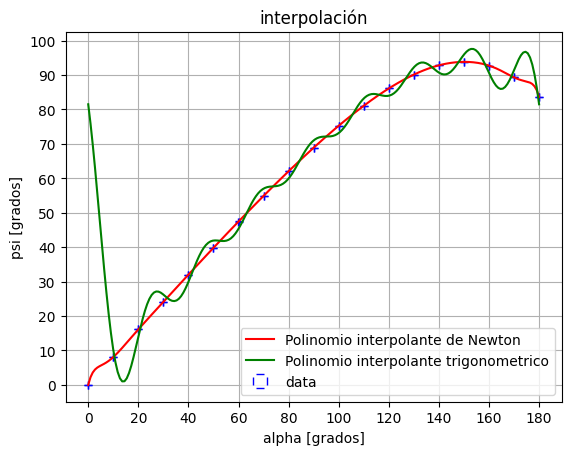

In [17]:
#definiendo funciones para graficar
fpol = sp.lambdify(alpha, pol)
ftrig = sp.lambdify(alpha, trig)

#definiendo arreglos de variables y funciones
alp = np.linspace(min(dat.x),max(dat.x),200)
pol_psi = fpol(alp)
trig_psi = ftrig(alp)

'graficando'
plt.errorbar(dat.x, dat.y, xerr=incert, yerr=incert, fmt='bo', markersize=0, capsize=3, elinewidth=0, label='data') #puntos con incertidumbre
plt.xlabel('alpha [grados]') # Etiqueta del eje x
plt.ylabel('psi [grados]') # Etiqueta del eje y
plt.xticks(np.arange(0, max(dat.x)*1.1, 20)) #escala x
plt.yticks(np.arange(0, max(dat.y)*1.1, 10)) #escala y
plt.plot(alp, pol_psi, 'r-', label='Polinomio interpolante de Newton') #graficando pol
plt.plot(alp, trig_psi, 'g-', label='Polinomio interpolante trigonometrico') # graficando trig
plt.title('interpolación') # Título del gráfico
plt.grid(True) # Mostrar cuadrícula en el gráfico
plt.legend() # Mostrar leyenda
plt.show() # Mostrar el gráfico

### **5. Problema N°3**

Establecer el sistema de ecuaciones no lineales asociado al problema de las varillas. Resolver por
los métodos de Newton y cuasi-Newton fijando una tolerancia de $10^{−5}$, se deja al participante
establecer el iterado inicial $x_0$.

<center>
    <img src="./ejercicio3.jpg" alt="figura 3" style="width: 15cm;"/>
</center>

<center>Figure 3.1. Representación vectorial del sistema de varillas</center>

Considerando en el mecanismo el acoplamiento de la barra cuatro tal como aparece en la Figura 3, el ángulo $\alpha = \theta_4 - \pi$ es la entrada a este mecanismo y el ángulo $\phi = \theta_2$ es la salida, con lo que podemos obtener una relación entre $\alpha$ y $\phi$ por medio de la siguiente ecuación:

$$-\overrightarrow{r_1}+\overrightarrow{r_2}+\overrightarrow{r_3}+\overrightarrow{r_4} = 0$$

Situando $\overrightarrow{r_1}$ a lo largo del eje OX la ecuación vectorial anterior se puede escribir como dos ecuaciones escalares, correspondientes a las componentes x e y de los vectores $\overrightarrow{r}$, además llamaremos $\theta = \theta_3$, quedando así,

Para las componentes x:

$$-r_1 + r_2cos(\phi) + r_3cos(\theta) +r_4cos(\theta_4) = 0$$

Si $\alpha = \theta_4 - \pi \; \rightarrow \theta_4 = \pi +\alpha$, entonces

$$-r_1 + r_2cos(\phi) + r_3cos(\theta) +r_4cos(\pi +\alpha) = 0$$

Se sabe que $cos(\pi +\alpha) = cos(\pi)cos(\alpha) - sen(\pi)sen(\alpha) = -cos(\alpha)$

$$-r_1 + r_2cos(\phi) + r_3cos(\theta) - r_4cos(\alpha) = 0 \; \; \; (3.1)$$

Para las componentes y:

$$r_2sen(\phi) + r_3sen(\theta) +r_4sen(\theta_4) = 0$$

$$r_2sen(\phi) + r_3sen(\theta) +r_4sen(\pi +\alpha) = 0$$

Se sabe que $sen(\pi + \alpha) = sen(\pi)cos(\alpha) + cos(\pi)sen(\alpha) = -sen(\alpha)$

$$r_2sen(\phi) + r_3sen(\theta) - r_4sen(\alpha) = 0 \; \; \; (3.2)$$

Por otra parte, utilizando ley de cosenos, se tiene que

$$ r_0^2 = r_1^2 + r_2^2 - 2r_1r_2cos(\phi) $$

y

$$ r_0^2 = r_3^2 + r_4^2 - 2r_3r_4cos(\alpha + 2\pi - \theta) $$

Se sabe que $cos(\alpha+2\pi-\theta) = cos(2\pi)cos(\alpha-\theta) - sen(2\pi)sen(\alpha-\theta) = cos(\alpha-\theta)$

$$ r_0^2 = r_3^2 + r_4^2 - 2r_3r_4cos(\alpha - \theta) $$

Igualando ecuaciones relacionadas a $r_0^2$

$$ r_0^2 = r_1^2 + r_2^2 - 2r_1r_2cos(\phi) = r_3^2 + r_4^2 - 2r_3r_4cos(\alpha - \theta) $$

Entonces

$$ r_1^2 + r_2^2 - r_3^2 - r_4^2 - 2r_1r_2cos(\phi) + 2r_3r_4cos(\alpha - \theta) = 0 \; \; \; (3.3)$$

De las ecuaciones (3.1), (3.2) y (3.3) se establece un sistema de 3 ecuaciones no lineales con 3 variables $\phi$, $\alpha$ y $\theta$.

$$\left\{ \begin{array}{rcl}
    -r_1 + r_2cos(\phi) + r_3cos(\theta) - r_4cos(\alpha) & = & 0 \\
    r_2sen(\phi) + r_3sen(\theta) - r_4sen(\alpha) & = & 0 \\
    r_1^2 + r_2^2 - r_3^2 - r_4^2 - 2r_1r_2cos(\phi) + 2r_3r_4cos(\alpha - \theta) & = & 0
\end{array} \right.$$

El cual se resolverá con métodos numéricos posteriormente.

Basándose en la figura 2.1 se estiman los siguientes valores pra la longitud de las barras

$$\begin{split}
    r_1 = & 10 \\
    r_2 = & 6 \\
    r_3 = & 8 \\
    r_4 = & 4 \\ 
\end{split}$$

In [18]:
#definiendo parámetros
r1, r2, r3, r4 = 10, 6, 8, 4
itera = 1000
tol = 1e-5

In [19]:
# phi : x1
# alpha : x2
# theta : x3
var = sp.symbols('x1, x2, x3')

c = sp.pi/180 #factor de conversion de grados a radianes

#matriz de ecuaciones no lineales
f1 = -r1 +r2*sp.cos(c*var[0]) + r3*sp.cos(c*var[2]) - r4*sp.cos(c*var[1])
f2 = r2*sp.sin(c*var[0]) + r3*sp.sin(c*var[2]) - r4*sp.sin(c*var[1])
f3 = r1**2 + r2**2 - r3**2 - r4**2 - 2*r1*r2*sp.cos(c*var[0]) + 2*r3*r4*sp.cos(c*var[1]-var[2])
F = [f1, f2, f3]

Basándose en la figura 2.1, se desea saber los ángulos en aproximadamente la configuración mostrada, entonces se estiman,

$$\begin{split}
    \phi & = 45° \\
    \alpha & = 60° \\
    \theta & = 360°
\end{split}$$

In [20]:
#prueba 1
ang = [45, 60, 360]
sol1 = analisis_SENL(SENL, ruta, ang, F, itera, tol, var, 1)


phi =  10.508401757883135

alpha =  13.027369446415356

theta =  358.62038235891924


Evaluando el valor de $\alpha$ en el polinomio interpolante, para verificar que sigue un comportamiento

In [23]:
print(sol1[1])
print('\nEvaluando en el polinomio interpolante de Newton:\n', fpol(sol1[1]))

13.027369446415356

Evaluando en el polinomio interpolante de Newton:
 10.318307249061169


Considerablemente cercano al valor de $\phi$ calculado en el sistema de ecuaciones

Basándose en la figura 2.1, se desea saber los ángulos en aproximadamente la configuración mostrada en miniatura, entonces se estiman,

$$\begin{split}
    \phi & = 345° \\
    \alpha & = 40° \\
    \theta & = 20°
\end{split}$$

In [22]:
#prueba 2
ang = [345, 40, 20]
analisis_SENL(SENL, ruta, ang, F, itera, tol, var, 2)


phi =  353.0203258259432

alpha =  29.086608646439878

theta =  19.52411009509632


[353.0203258259432, 29.086608646439878, 19.52411009509632]

### **6. Conclusión**

Para el ejercicio N°1 se logró hallar la compresion de los resortes en un estado de equilibrio con todas las fuerzas señaldas indicando una deformación de los resortes de entre 10 y 20 [cm] cada uno; razonable según los parámetros establecidos. Cabe señalar que todos los métodos numéricos relacionados al análisis de sistemas lineales, excepto el mpetodo de Cholesky, llegaron a resultados con distinta precisión que nos permite obtener una aproximación razonable.

Por otra parte gracias a la interpolación realizada en el ejercicio N°2 fue posible encontrar dos modelos, un polinomio por diferencias divididas y uno trigonométrico, que permiten estudiar el sistema de barras en distintas configuraciones y, por tanto aproximar un ángulo $\phi$ de salida respecto a uno de entrada $\alpha$ sin necesidad de medirlo experimentalmente. Esto último fue de gran utilidad para comprobación del ejercicio N°3.

Por último es notable que en el ejercicio N°3, a travez de el análisis de sistemas no lineales por el método de Newton, se logró encontrar la configuración de los ángulos exactos (por el bajo error) de cada barra a partir de una aproximación inicial deseada, siendo predominante la desición del ángulo $\theta_3$ que debido a su posición posee limitado muestreo de ángulo.

Cabe señalar que los métodos numéricos facilitaron cálculos que llevarian mucho más tiempo si se realizaran manualmente, sin embargo siempre es necesario el factor humano y ciertos conocimientos sobre el tema de la problematica que se desea resolver para llegar a resultados concretos.